<a href="https://colab.research.google.com/github/gawandepranil/customer-churn-analysis/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")

In [ ]:
# Show the first few rows
print(df.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Show the column names
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Sort by Tenure in ascending order
sorted_by_tenure = df.sort_values(by='tenure', ascending= True)

# Show shortest and longest tenure customers
print("\n Customers with Shortest Tenure:")
print(sorted_by_tenure.head())

print("\n Customers with Longest Tenure:")
print(sorted_by_tenure.tail())


 Customers with Shortest Tenure:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
936   5709-LVOEQ  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
488   4472-LVYGI  Female              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
936           Yes                No             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
488            No  No phone service             DSL                  Yes  ...   

         DeviceProtection          TechSupport          St

In [ ]:
churned_customers = df[df['Churn'] == 'Yes']

# Show first 5 churned customers
print("\n Churned Customers:")
print(churned_customers.head())



 Churned Customers:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2   3668-QPYBK    Male              0      No         No       2          Yes   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
2             No             DSL            Yes  ...               No   
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
8            Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Con

In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Clean 'TotalCharges' if it's blank or object type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])



Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-17-62f672ce5ca9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='Set2')


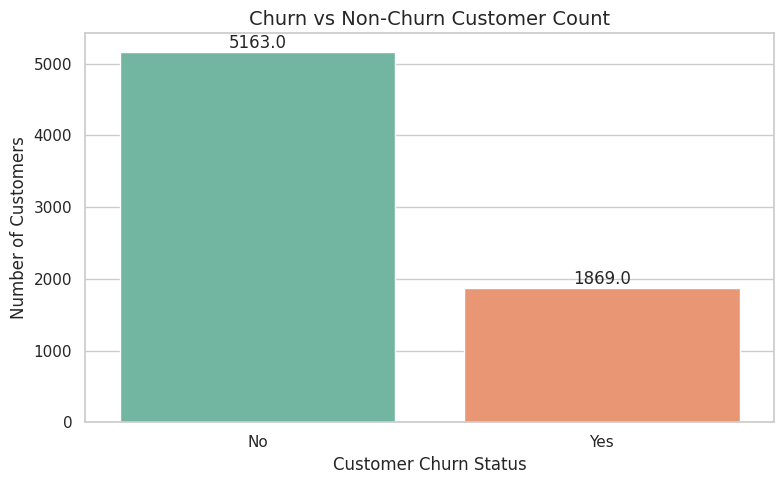

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Count churn values
churn_counts = df['Churn'].value_counts()

# Create a barplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, palette='Set2')

# Add exact count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Churn vs Non-Churn Customer Count', fontsize=14)
plt.xlabel('Customer Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


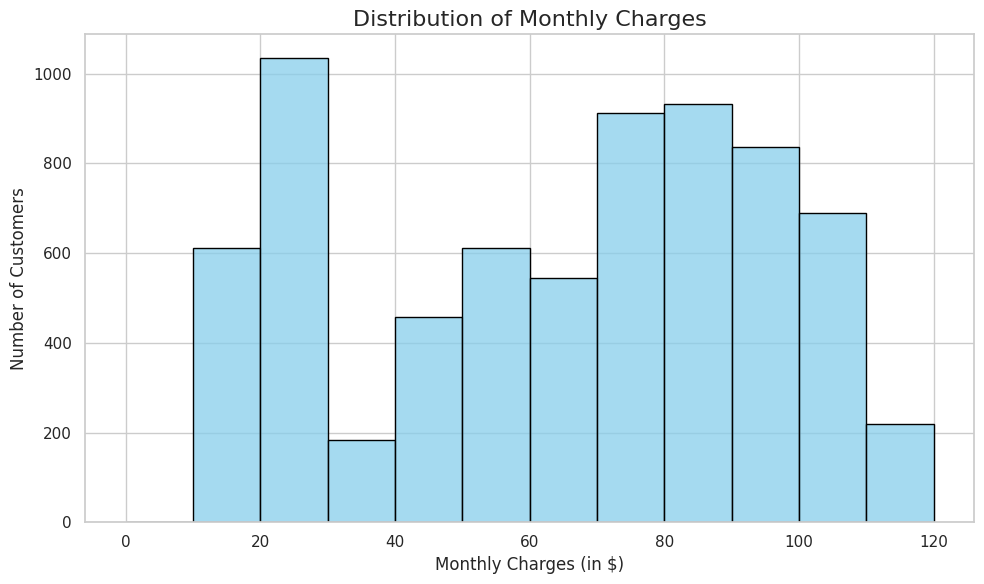

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create the histogram with bin width ~10
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=range(0, int(df['MonthlyCharges'].max()) + 10, 10), color='skyblue', edgecolor='black')

# Add titles and axis labels
plt.title('Distribution of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges (in $)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()


In [ ]:
# Create pivot table with counts of churn status per gender
pivot = pd.pivot_table(df, index='gender', columns='Churn',
                       values='customerID', aggfunc='count', fill_value=0)

# Rename columns for clarity
pivot.columns.name = None
pivot.reset_index(inplace=True)

# Display pivot table
print(pivot)


   gender    No  Yes
0  Female  2544  939
1    Male  2619  930


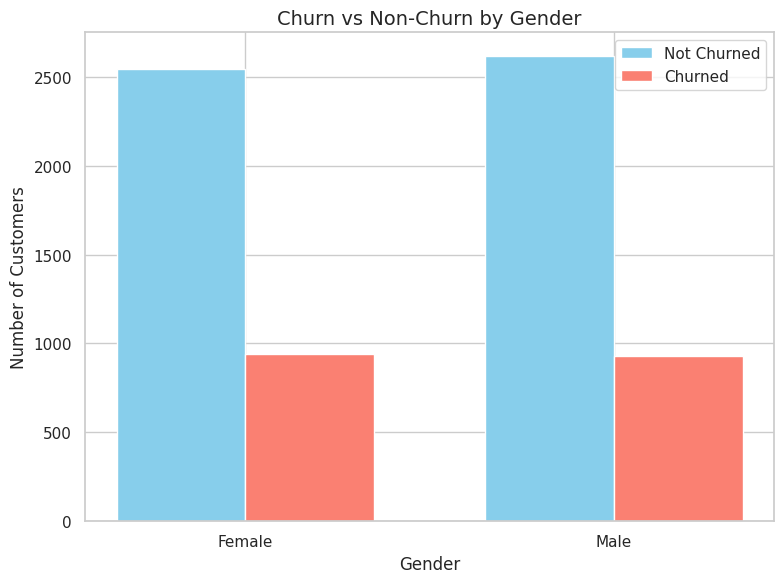

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(pivot['gender']))

# Bar chart
plt.bar(x, pivot['No'], width=bar_width, label='Not Churned', color='skyblue')
plt.bar([i + bar_width for i in x], pivot['Yes'], width=bar_width, label='Churned', color='salmon')

# Labels and ticks
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Churn vs Non-Churn by Gender', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], pivot['gender'])
plt.legend()

plt.tight_layout()
plt.show()
